# Normalization:
The purpose of normalization is to eliminate or reduce the effects of differences in the scales or units of measurement of different variables.

## Type of normalization
### Min-Max normalization :
Scaling data between 0 and 1. 

normalized_value = (value - min_value) / (max_value - min_value).

Here we are squashing data in beyween 0 to 1 so impact of outlier will also squish But this method effect the outlier and scale the outlier data in range between 0 and 1.

It is useful when you know the min max value. eg. image processing (CNN).we know the min pixel and max pixel.

### mean normalization:
normalized_value = (value - mean_value) / (max_value - min_value) 

Here we are doing mean centering and scaling in range betweein -1 to 1.

It is useful when we need centered data. but we can achieve this by standardization. so this technoque is not popular.

### max absolute scaling :
Values are scaled between -1 and 1, while preserving the sign (positive or negative) of the original values. 

normalized_value = value / abs(max_value) 

Useful in sparse data.

### Robust scaling :
This technique is designed to be robust to outliers or extreme values in the dataset. It scales the data by subtracting the median and dividing by the interquartile range (IQR = 75th percentile value - 25th percentile value). 

normalized_value = (value - median) / IQR 

Robust scaling is less affected by outliers.

Robust scaling assumes a symmetric distribution and may not be suitable for data that does not follow such a distribution.

# difference between normalization and standardization:
### Scaling Range:
Normalization scales data to a specific range, often between 0 and 1, whereas standardization transforms data to have a mean of 0 and a standard deviation of 1.

### Handling Outliers:
Normalization is sensitive to outliers since it uses the minimum and maximum values of the dataset. Standardization is more robust to outliers because it relies on the mean and standard deviation.

### Interpretation:
Normalized values represent the relative position of a data point within the range of the variable. Standardized values represent the number of standard deviations a data point is away from the mean. Standardized values allow for direct comparison of the relative position of data points across variables.

### Distribution Shape:
Normalization does not assume a specific distribution shape and can be used for any distribution. Standardization assumes a normal distribution or approximate normality, as it centers the data around the mean and scales it based on the standard deviation.



# Max Absolute Scaling


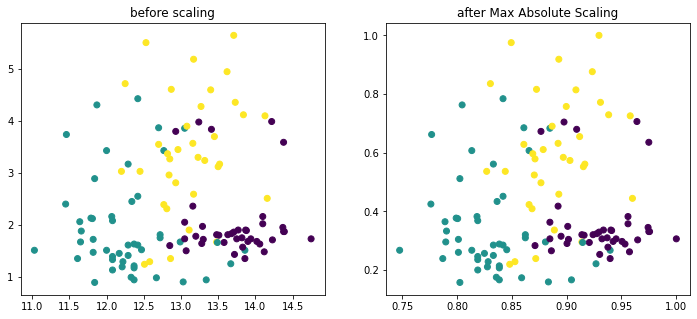

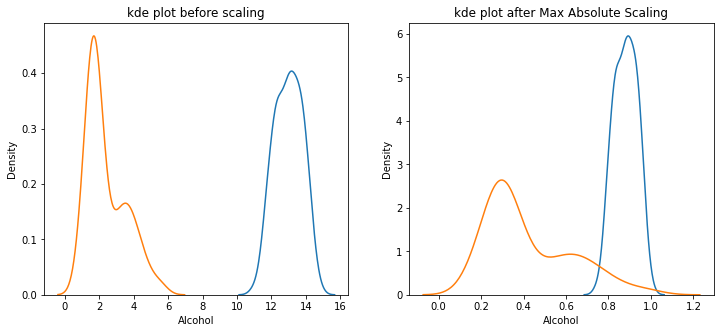

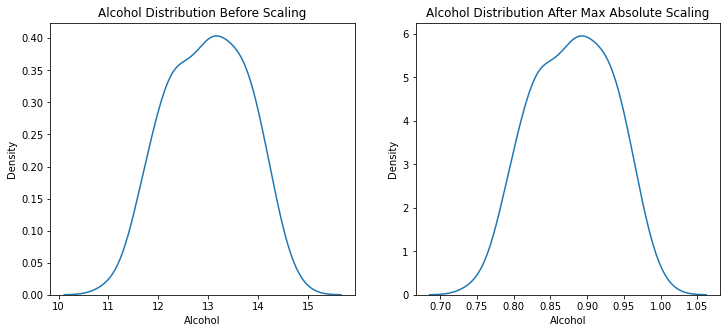

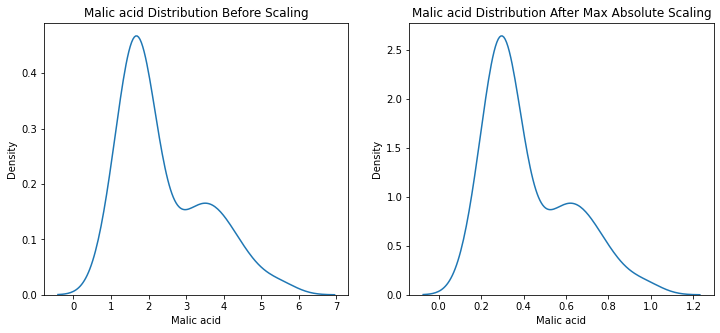

logistic regression performance using actual data :  0.7592592592592593
logistic regression performance using Max Absolute Scaling :  0.5925925925925926


In [5]:
# Max Absolute Scaling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_csv_file(file_name):
    data = pd.read_csv(file_name,header=None,usecols=[0,1,2])
    data.columns=['Class label', 'Alcohol', 'Malic acid']
    return data


def plot_graphs(X_train,X_train_scaled,Y_train):
    #scatter plot for actual data and scaled data
    fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
    ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=Y_train)
    ax1.set_title('before scaling')
    ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=Y_train)
    ax2.set_title('after Max Absolute Scaling')
    plt.show()
    
    #kernel density estimation plot for actual data and scaled data
    fig, (a1, a2) = plt.subplots(ncols=2,figsize=(12, 5))
    sns.kdeplot(X_train['Alcohol'],ax=a1)
    sns.kdeplot(X_train['Malic acid'],ax=a1)
    a1.set_title('kde plot before scaling')
    sns.kdeplot(X_train_scaled['Alcohol'],ax=a2)
    sns.kdeplot(X_train_scaled['Malic acid'],ax=a2)
    a2.set_title('kde plot after Max Absolute Scaling')
    plt.show()
    
    #kde plot for Alcohol distribution before scaling and after scaling
    fig, (b1, b2) = plt.subplots(ncols=2,figsize=(12, 5))
    sns.kdeplot(X_train['Alcohol'],ax=b1)
    b1.set_title('Alcohol Distribution Before Scaling')
    sns.kdeplot(X_train_scaled['Alcohol'],ax=b2)
    b2.set_title('Alcohol Distribution After Max Absolute Scaling')
    plt.show()
    
    #kde plot for EstimatedSalary distribution before scaling and after scaling
    fig, (c1, c2) = plt.subplots(ncols=2,figsize=(12, 5))
    sns.kdeplot(X_train['Malic acid'],ax=c1)
    c1.set_title('Malic acid Distribution Before Scaling')
    sns.kdeplot(X_train_scaled['Malic acid'],ax=c2)
    c2.set_title('Malic acid Distribution After Max Absolute Scaling')
    plt.show()
    
    
def logistic_Regression_Using_actualData_and_MaxAbsScaler(data):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(data.drop('Class label', axis=1),
                                                 data['Class label'],
                                                 test_size=0.3,
                                                 random_state=0)
    
    from sklearn.preprocessing import MaxAbsScaler
    scale = MaxAbsScaler()
    # fit the scale to the train set, it will learn the parameters 
    scale.fit(X_train)
    # transform train and test sets.we are scaling data in range[-1,1]. it will return dta in numpy
    X_train_scaled = scale.transform(X_train) 
    X_test_scaled = scale.transform(X_test)
    
    # above statement return data in numpy so we need to tramsform in dataframe.
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    plot_graphs(X_train, X_train_scaled, Y_train)
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr_scaled = LogisticRegression()
    
    lr.fit(X_train,Y_train)
    lr_scaled.fit(X_train_scaled,Y_train)
    
    Y_pred = lr.predict(X_test)
    Y_pred_scaled = lr_scaled.predict(X_test_scaled)
    
    from sklearn.metrics import accuracy_score
    
    print("logistic regression performance using actual data : ",accuracy_score(Y_test,Y_pred))
    print("logistic regression performance using Max Absolute Scaling : ",accuracy_score(Y_test,Y_pred_scaled))
    

    
data = read_csv_file('wine_data.csv')

logistic_Regression_Using_actualData_and_MaxAbsScaler(data)